In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import missingno as msno # it show missing values in the form of graph
import pingouin as pg

In [3]:
try:
    df = pd.read_csv(r"C:\Users\Admin\python\Quater2\astronauts.csv")
    print('downloaded')
except:
    print('problem')

downloaded


In [4]:
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [5]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Military Rank', 'Military Branch', 'Space Flights',
       'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions',
       'Death Date', 'Death Mission'],
      dtype='object')

In [6]:
df.sample(10)#bring random data from dataset 

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
46,John S. Bull,1966.0,5.0,Deceased,9/25/1934,"Memphis, TN",Male,Rice University; Stanford University,Mechanical Engineering,Aeronautical Engineering,NaN,NaN,0,0,0,0.0,NaN,8/11/2008,NaN
313,Daniel M. Tani,1996.0,16.0,Retired,2/1/1961,"Ridley Park, PA",Male,MIT,Mechanical Engineering,Mechanical Engineering,NaN,NaN,2,3162,6,39.0,"STS-108 (Endeavor), STS-120/122 (Discovery/Atl...",NaN,NaN
77,Michael Collins,1963.0,3.0,Retired,10/31/1930,"Rome, Italy",Male,US Military Academy,NaN,NaN,NaN,US Air Force Reserves,2,266,1,1.0,"Gemini 10, Apollo 11",NaN,NaN
332,Charles D. Walker,NaN,NaN,Retired,8/29/1948,"Bedford, IN",Male,Purdue University,Aeronautical & Astronautical Engineering,NaN,NaN,NaN,3,477,0,0.0,"STS 41-D (Discovery), STS 51-D (Discovery), ST...",NaN,NaN
308,Nicole P. Stott,2000.0,18.0,Active,11/19/1962,"Albany, NY",Female,Embry-Riddle Aeronautical University; Universi...,Aeronautical Engineering,Engineering Management,NaN,NaN,2,2477,1,6.0,"STS-128/129 (Discovery/Atlantis), STS-133 (Dis...",NaN,NaN
176,Brent W. Jett,1992.0,14.0,Retired,10/5/1958,"Pontiac, MI",Male,US Naval Academy; US Naval Postgraduate School,Aerospace Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1002,0,0.0,"STS-72 (Endeavor), STS-81 (Atlantis), STS-97 (...",NaN,NaN
246,Brian T. O'Leary,1967.0,6.0,Deceased,1/27/1940,"Boston, MA",Male,Williams College; Georgetown University; Unive...,Physics,Astronomy,NaN,NaN,0,0,0,0.0,NaN,7/28/2011,NaN
153,Susan J. Helms,1990.0,13.0,Retired,2/26/1958,"Charlotte, NC",Female,US Air Force Academy; Stanford University,Aeronautical Engineering,Aeronautics & Astronautics,Lieutenant General,US Air Force,5,5063,1,9.0,"STS-54 (Endeavor), STS-64 (Discovery), STS-78 ...",NaN,NaN
186,Robert Shane Kimbrough,2004.0,19.0,Active,6/4/1967,"Killeen, TX",Male,US Military Academy; Georgia Institute of Tech...,Aerospace Engineering,Operations Research,Colonel,US Army,3,3720,4,25.0,"STS-126 (Endeavor), ISS-49/50 (Soyuz)",NaN,NaN
162,Kathryn P. Hire,1995.0,15.0,Management,8/26/1959,"Mobile, AL",Female,US Naval Academy; Florida State Institute of T...,Engineering Management,Space Technology,Captain,US Naval Reserves,2,711,0,0.0,"STS-90 (Columbia), STS-130 (Endeavor)",NaN,NaN


In [7]:
#df.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [8]:
df.head(1)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN


In [9]:
df.rename(columns={'Birth Date':'Birth_Date', 'Birth Place':'Birth_Place','Alma Mater':'Alma_Mater', 'Undergraduate Major':'Undergraduate_Major', 'Graduate Major':'Graduate_Major',
       'Military Rank':'Military_Rank', 'Military Branch':'Military_Branch', 'Space Flights':'Space_Flights',
       'Space Flight (hr)':'Space_Flight_(hr)', 'Space Walks':'Space_Walks', 'Space Walks (hr)':'Space_Walks_(hr)',
       'Death Date':'Death_Date', 'Death Mission':'Death_Mission'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth_Date           357 non-null    object 
 5   Birth_Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma_Mater           356 non-null    object 
 8   Undergraduate_Major  335 non-null    object 
 9   Graduate_Major       298 non-null    object 
 10  Military_Rank        207 non-null    object 
 11  Military_Branch      211 non-null    object 
 12  Space_Flights        357 non-null    int64  
 13  Space_Flight_(hr)    357 non-null    int64  
 14  Space_Walks          357 non-null    int64  
 15  Space_Walks_(hr)     357 non-null    flo

Name                     0
Year                    27
Group                   27
Status                   0
Birth_Date               0
Birth_Place              0
Gender                   0
Alma_Mater               1
Undergraduate_Major     22
Graduate_Major          59
Military_Rank          150
Military_Branch        146
Space_Flights            0
Space_Flight_(hr)        0
Space_Walks              0
Space_Walks_(hr)         0
Missions                23
Death_Date             305
Death_Mission          341
dtype: int64

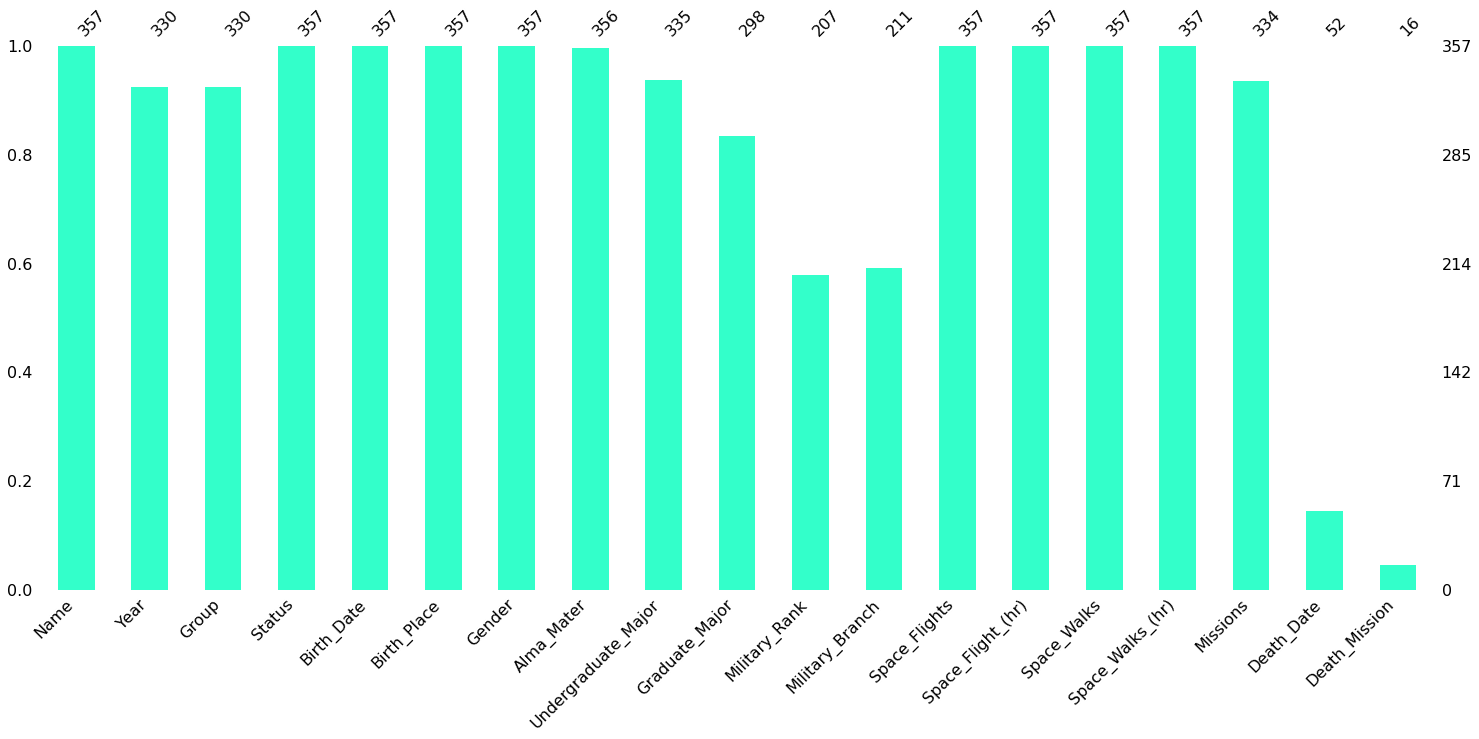

In [11]:
#missing value analysis
msno.bar(df,color='#33FFCA',)
df.isnull().sum()

In [12]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth_Date', 'Birth_Place',
       'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major',
       'Military_Rank', 'Military_Branch', 'Space_Flights',
       'Space_Flight_(hr)', 'Space_Walks', 'Space_Walks_(hr)', 'Missions',
       'Death_Date', 'Death_Mission'],
      dtype='object')

In [13]:
#nan by default is floatdef get_each_dtpyes(col_list):
def get_each_dtpyes(col_list):
    ob = []
    integer = []
    fl = []
    data_time = []
    for i in col_list:
        if df[i].dtypes == 'object':
            ob.append(i)
        if df[i].dtypes == 'int64':
            integer.append(i)
        if  df[i].dtypes == 'float64':
            fl.append(i)
        if df[i].dtypes == 'datetime64[ns]':
            data_time.append(i)
    return print(f"list of object dtpyes:\n{ob}\n\nlist of integers dtypes:\n{integer}\n\nlist of float dtypes:\n{fl}\n\nlist of datatime dtype:\n{data_time}")
get_each_dtpyes(['Name', 'Year', 'Group', 'Status', 'Birth_Date', 'Birth_Place',
       'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major',
       'Military_Rank', 'Military_Branch', 'Space_Flights',
       'Space_Flight_(hr)', 'Space_Walks', 'Space_Walks_(hr)', 'Missions',
       'Death_Date', 'Death_Mission'])

list of object dtpyes:
['Name', 'Status', 'Birth_Date', 'Birth_Place', 'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major', 'Military_Rank', 'Military_Branch', 'Missions', 'Death_Date', 'Death_Mission']

list of integers dtypes:
['Space_Flights', 'Space_Flight_(hr)', 'Space_Walks']

list of float dtypes:
['Year', 'Group', 'Space_Walks_(hr)']

list of datatime dtype:
[]


In [14]:
#df[df.Death_Mission]

In [15]:
df[df.isnull()] # it is called masking 

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[~df.isnull()] # it is called masking 

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [17]:
df[df.notnull()]

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [18]:
df[df.Year.notnull()]

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [19]:
valid = df.isnull().sum()# show the quality of data
valid

Name                     0
Year                    27
Group                   27
Status                   0
Birth_Date               0
Birth_Place              0
Gender                   0
Alma_Mater               1
Undergraduate_Major     22
Graduate_Major          59
Military_Rank          150
Military_Branch        146
Space_Flights            0
Space_Flight_(hr)        0
Space_Walks              0
Space_Walks_(hr)         0
Missions                23
Death_Date             305
Death_Mission          341
dtype: int64

In [20]:
invalid = df.notnull().sum()# show the quality of data
invalid

Name                   357
Year                   330
Group                  330
Status                 357
Birth_Date             357
Birth_Place            357
Gender                 357
Alma_Mater             356
Undergraduate_Major    335
Graduate_Major         298
Military_Rank          207
Military_Branch        211
Space_Flights          357
Space_Flight_(hr)      357
Space_Walks            357
Space_Walks_(hr)       357
Missions               334
Death_Date              52
Death_Mission           16
dtype: int64

In [21]:
df['Year']=df['Year'].astype('datetime64[ns]')

In [22]:
df.Year.dtypes

dtype('<M8[ns]')

In [23]:
df.Year

0     1970-01-01 00:00:00.000002004
1                               NaT
2     1970-01-01 00:00:00.000001984
3     1970-01-01 00:00:00.000001987
4     1970-01-01 00:00:00.000001963
                   ...             
352   1970-01-01 00:00:00.000001990
353   1970-01-01 00:00:00.000001998
354   1970-01-01 00:00:00.000001966
355   1970-01-01 00:00:00.000001962
356   1970-01-01 00:00:00.000001998
Name: Year, Length: 357, dtype: datetime64[ns]

In [24]:
df['Birth_Date']=df['Birth_Date'].astype('datetime64[ns]')

In [25]:
df.Birth_Date

0     1967-05-17
1     1936-03-07
2     1946-03-03
3     1951-05-20
4     1930-01-20
         ...    
352   1956-08-23
353   1962-07-26
354   1932-02-07
355   1930-09-24
356   1962-06-29
Name: Birth_Date, Length: 357, dtype: datetime64[ns]

In [26]:
#df['Death_Mission']=df['Death_Mission'].astype('datetime64[ns]')
#error b/c too much nan values

In [27]:
df['Death_Mission']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
352    NaN
353    NaN
354    NaN
355    NaN
356    NaN
Name: Death_Mission, Length: 357, dtype: object

In [28]:
df.Status.value_counts()

Retired       220
Deceased       51
Active         50
Management     36
Name: Status, dtype: int64

In [29]:
df.Status.unique()

array(['Active', 'Retired', 'Deceased', 'Management'], dtype=object)

In [30]:
df.Status.nunique()

4

In [31]:
df.Alma_Mater.value_counts()

US Naval Academy                                                 12
US Naval Academy; US Naval Postgraduate School                   11
US Air Force Academy; Purdue University                           7
Purdue University                                                 7
MIT                                                               5
                                                                 ..
University of Rochester; California Institute of Technology       1
California Polytechnic Institute                                  1
Muskingum College                                                 1
Southeast Missouri State; University of Missouri                  1
MIT; University of Texas-Austin; George Washington University     1
Name: Alma_Mater, Length: 280, dtype: int64

In [32]:
df.Alma_Mater.unique()# it also include nan as unique

array(['University of California-Santa Barbara; University of Arizona',
       'Montana State University; University of Colorado',
       'US Military Academy; Princeton University',
       'University of Missouri-Rolla', 'US Military Academy; MIT',
       'Villanova University; University of Florida',
       'DePauw University; Yale University',
       'University of Illinois; US Naval Postgraduate School',
       'US Naval Academy; Air Force Institute of Technology',
       'Hastings College; Iowa State University',
       'University of Washington; Creighton University',
       'MIT; University of Washington', 'Harvard University; MIT',
       'University of Illinois-Urbana',
       'Purdue University; University of Southern California',
       'Frostburg State University; University of Maryland',
       'University of Idaho; University of Tennessee',
       'George Washington University; University of Texas',
       'Drexel University; Thomas Jefferson University',
       'State Un

In [33]:
df.Alma_Mater.nunique()#  it does not include nan as unique 

280

In [34]:
df.Year.mode()

0   1970-01-01 00:00:00.000001978
1   1970-01-01 00:00:00.000001996
Name: Year, dtype: datetime64[ns]

In [35]:
# missing values handling 
# - 1)fillna()
df.Year=df.Year.fillna(df.Year.mode,inplace=True)

In [36]:
df.Year

0      None
1      None
2      None
3      None
4      None
       ... 
352    None
353    None
354    None
355    None
356    None
Name: Year, Length: 357, dtype: object

In [37]:
df

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,None,19.0,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,None,NaN,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,None,10.0,Retired,1946-03-03,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,None,12.0,Retired,1951-05-20,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,None,3.0,Retired,1930-01-20,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,None,13.0,Retired,1956-08-23,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,None,17.0,Retired,1962-07-26,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,None,5.0,Retired,1932-02-07,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,None,2.0,Retired,1930-09-24,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


# Handling Missing Values
- filling missing values
- dropping missing values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 357 non-null    object        
 1   Year                 0 non-null      object        
 2   Group                330 non-null    float64       
 3   Status               357 non-null    object        
 4   Birth_Date           357 non-null    datetime64[ns]
 5   Birth_Place          357 non-null    object        
 6   Gender               357 non-null    object        
 7   Alma_Mater           356 non-null    object        
 8   Undergraduate_Major  335 non-null    object        
 9   Graduate_Major       298 non-null    object        
 10  Military_Rank        207 non-null    object        
 11  Military_Branch      211 non-null    object        
 12  Space_Flights        357 non-null    int64         
 13  Space_Flight_(hr)    357 non-null  

In [40]:
df.Year.isnull().sum()

357

In [43]:
df.Year.fillna(df.Year.mode(),inplace=True)
df.Year

0      None
1      None
2      None
3      None
4      None
       ... 
352    None
353    None
354    None
355    None
356    None
Name: Year, Length: 357, dtype: object

In [44]:
df.Year.isnull().sum()

357

In [47]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth_Date', 'Birth_Place',
       'Gender', 'Alma_Mater', 'Undergraduate_Major', 'Graduate_Major',
       'Military_Rank', 'Military_Branch', 'Space_Flights',
       'Space_Flight_(hr)', 'Space_Walks', 'Space_Walks_(hr)', 'Missions',
       'Death_Date', 'Death_Mission'],
      dtype='object')

In [49]:
df.head(1)

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,None,19.0,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN


In [53]:
df.fillna({
            'Group':df.Group.mode(),
            'alma_mater':df.Alma_Mater.mode(),
            'undergraduate_major':df.Undergraduate_Major.mode(),
            'graduate_major':df.Graduate_Major.mode(),
            })

,Name,Year,Group,Status,Birth_Date,Birth_Place,Gender,Alma_Mater,Undergraduate_Major,Graduate_Major,Military_Rank,Military_Branch,Space_Flights,Space_Flight_(hr),Space_Walks,Space_Walks_(hr),Missions,Death_Date,Death_Mission
0,Joseph M. Acaba,None,19.0,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,None,16.0,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,None,10.0,Retired,1946-03-03,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,None,12.0,Retired,1951-05-20,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,None,3.0,Retired,1930-01-20,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,None,13.0,Retired,1956-08-23,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,None,17.0,Retired,1962-07-26,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,None,5.0,Retired,1932-02-07,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,None,2.0,Retired,1930-09-24,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN
